In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display
import geopandas as gpd
import numpy as np
import pandas as pd
import xarray as xr
import numpy as np
from matplotlib.colors import ListedColormap

In [2]:
# Read the shapefile and transform to EPSG:4326
shape_path_filename = r"..\..\Datasets\HRs\i03_Hydrologic_Regions.shp"
hrs = gpd.read_file(shape_path_filename).to_crs("EPSG:4326")

In [3]:
filepath = r'../../Outputs/pr__cum_loss.nc'
ds_new = xr.open_dataset(filepath)
print(list(ds_new.variables.keys()))

['lat', 'lon', '2020_20', 'mean_20', 'cum_loss_20', '2020_20_21', '2021', 'sum', 'mean_20_21', '2x mean', 'cum_loss_20_21', '2020_20_21_22', '2021_20_21_22', '2022_20_21_22', 'sum_20_21_22', 'mean_20_21_22', '3x mean_20_21_22', 'cum_loss_20_21_22', 'crs']


In [4]:
# Extract longitude, latitude, and data values
lon = ds_new.lon.values
lat = ds_new.lat.values

variable_to_plot = ds_new.cum_loss_20_21_22.values
# Create a meshgrid for lon and lat
lon_grid, lat_grid = np.meshgrid(lon, lat)

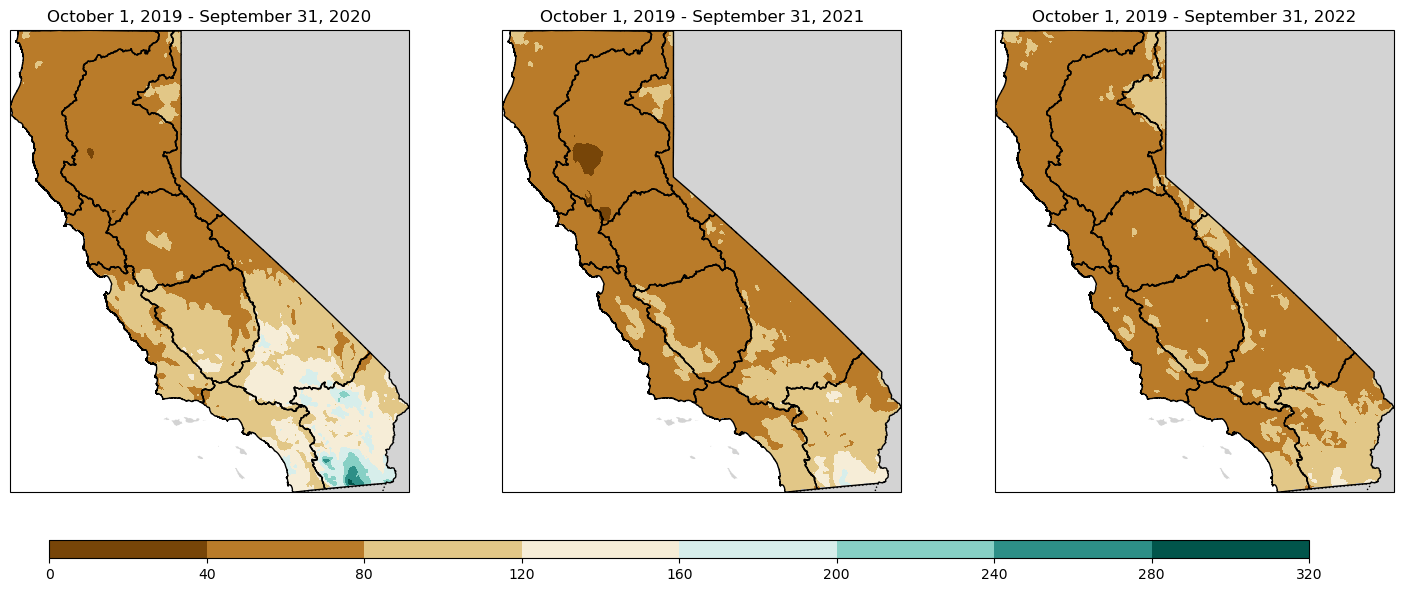

In [6]:
# Variables to plot
variables_to_plot = [
    ds_new.cum_loss_20.values,
    ds_new.cum_loss_20_21.values,
    ds_new.cum_loss_20_21_22.values
]

# Titles for subplots
titles = ['October 1, 2019 - September 31, 2020', 'October 1, 2019 - September 31, 2021', 'October 1, 2019 - September 31, 2022']

# Create subplots
fig, axes = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(18, 6))

# Create a colormap with distinct colors for each interval
cmap_discrete = ListedColormap(plt.get_cmap('BrBG')(np.linspace(0, 1, 17))[1::2])


# Iterate through variables and titles
for ax, variable, title in zip(axes, variables_to_plot, titles):
    # Set extent based on transformed geometries
    ax.set_extent([hrs.bounds['minx'].min(), hrs.bounds['maxx'].max(), hrs.bounds['miny'].min(), hrs.bounds['maxy'].max()])

    # Plot the contour with specified colormap
    img = ax.contourf(lon, lat, variable, transform=ccrs.PlateCarree(), cmap=cmap_discrete, levels=np.arange(0, 341, 40))

    # Add shapefile geometries
    hrs.plot(ax=ax, facecolor='none', edgecolor='black')

    # Add Natural Earth features for a basemap of the US
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')

    ax.set_title(title)


cbar_ax = fig.add_axes([0.15, 0.0, 0.7, 0.03])  # Adjust the position and size as needed
cbar = plt.colorbar(img, ax=ax, orientation='horizontal', shrink=0.8, ticks=np.arange(0, 341, 40), cax=cbar_ax)

# Overall title for the entire figure
# fig.suptitle('Percentage of Average Precipitation', y=1.02)

# Show the plot
plt.show()

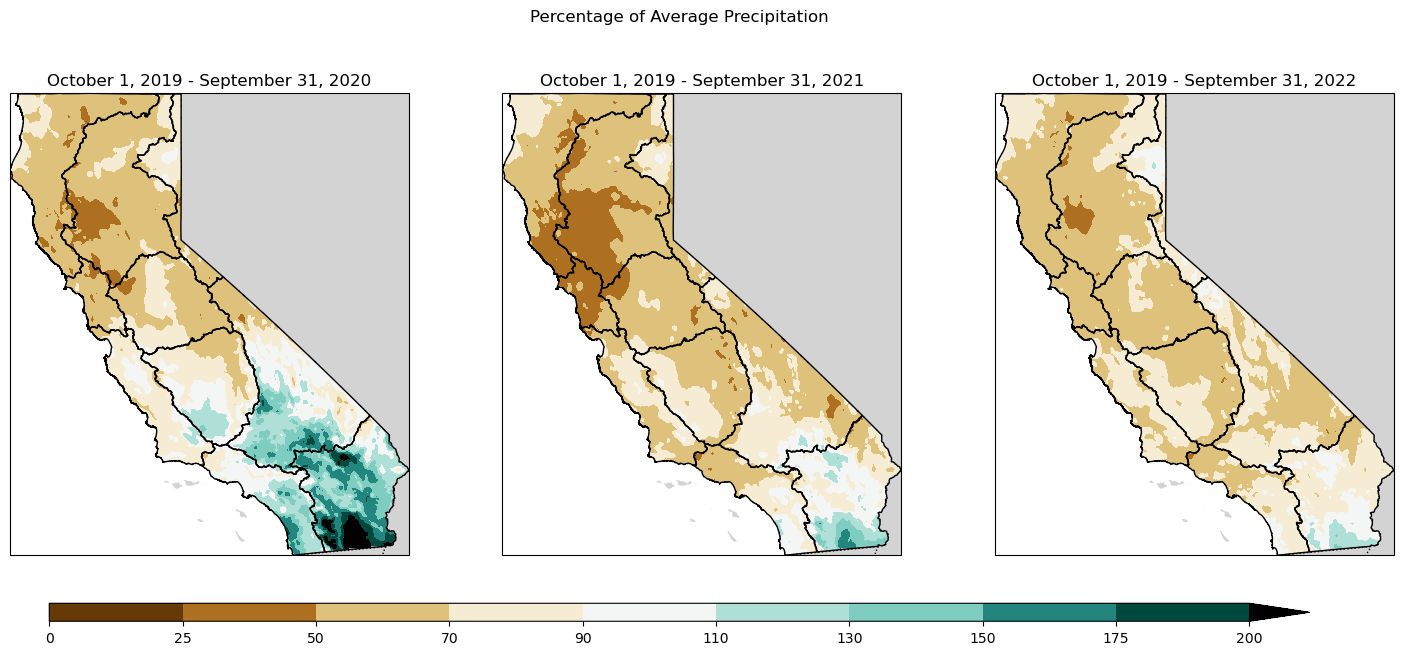

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap

# Variables to plot
variables_to_plot = [
    ds_new.cum_loss_20.values,
    ds_new.cum_loss_20_21.values,
    ds_new.cum_loss_20_21_22.values
]

# Titles for subplots
titles = ['October 1, 2019 - September 31, 2020', 'October 1, 2019 - September 31, 2021', 'October 1, 2019 - September 31, 2022']

# Create subplots
fig, axes = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(18, 6))

# Create a colormap with distinct colors for each interval
cmap_discrete = ListedColormap(plt.get_cmap('BrBG')(np.linspace(0, 1, 31))[1::2])

# Iterate through variables and titles
for ax, variable, title in zip(axes, variables_to_plot, titles):
    ax.set_extent([hrs.bounds['minx'].min(), hrs.bounds['maxx'].max(), hrs.bounds['miny'].min(), hrs.bounds['maxy'].max()])
    img = ax.contourf(lon, lat, variable, transform=ccrs.PlateCarree(), cmap=cmap_discrete, levels=[0,25,50,70,90,110,130,150,175,200], vmax=200, extend='max')
    img.cmap.set_over('black')

    hrs.plot(ax=ax, facecolor='none', edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.set_title(title)


cbar_ax = fig.add_axes([0.15, 0.0, 0.7, 0.03])  # Adjust the position and size as needed
cbar = plt.colorbar(img, ax=ax, orientation='horizontal', shrink=0.8, ticks=[0,25,50,70,90,110,130,150,175,200], cax=cbar_ax)

# Overall title for the entire figure
fig.suptitle('Percentage of Average Precipitation', y=1.02)

# Show the plot
plt.show()

This is trial

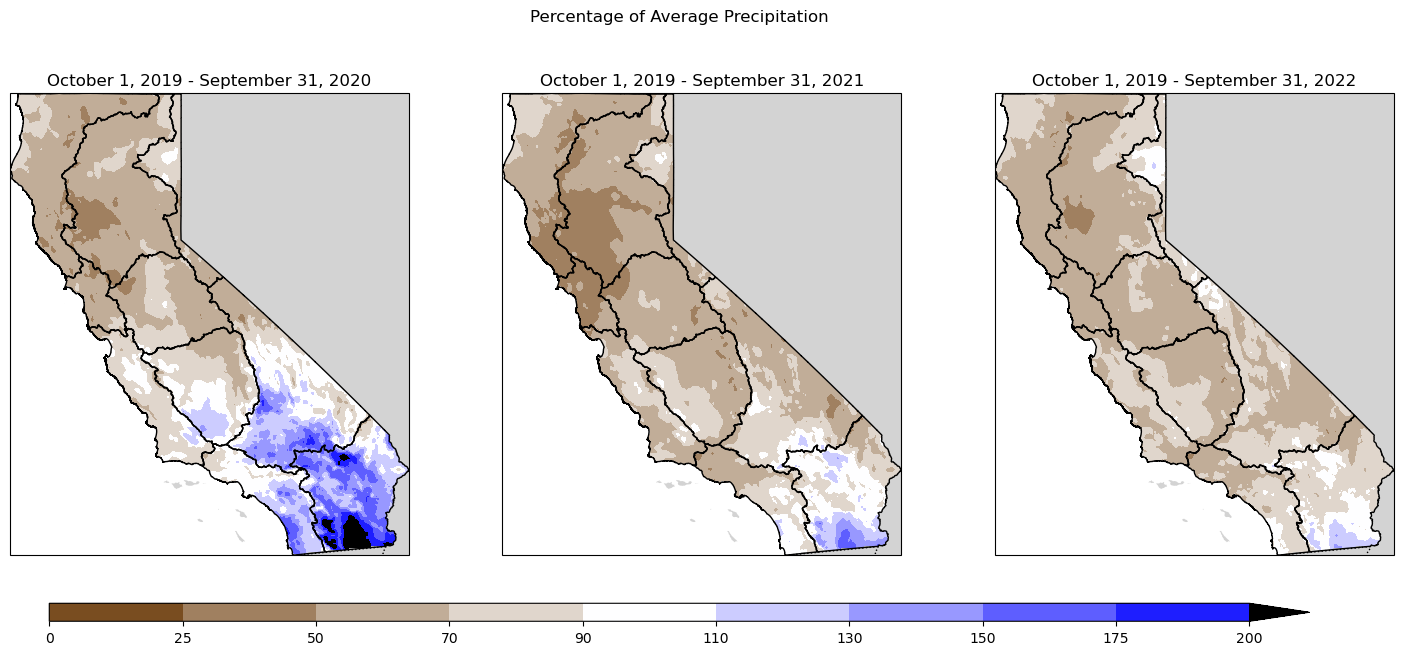

In [7]:
from matplotlib.colors import LinearSegmentedColormap

# Variables to plot
variables_to_plot = [
    ds_new.cum_loss_20.values,
    ds_new.cum_loss_20_21.values,
    ds_new.cum_loss_20_21_22.values
]

# Titles for subplots
titles = ['October 1, 2019 - September 31, 2020', 'October 1, 2019 - September 31, 2021', 'October 1, 2019 - September 31, 2022']

# Create subplots
fig, axes = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(18, 6))

def custom_cmap():
    brown = (0.4, 0.2, 0)
    white = (1, 1, 1)
    blue = (0, 0, 1)
    colors = [brown, white, blue]
    cmap_name = 'smooth_maroon_to_blue'
    return LinearSegmentedColormap.from_list(cmap_name, colors)

# Iterate through variables and titles
for ax, variable, title in zip(axes, variables_to_plot, titles):
    ax.set_extent([hrs.bounds['minx'].min(), hrs.bounds['maxx'].max(), hrs.bounds['miny'].min(), hrs.bounds['maxy'].max()])
    img = ax.contourf(lon, lat, variable, transform=ccrs.PlateCarree(), cmap=custom_cmap(), levels=[0,25,50,70,90,110,130,150,175,200], vmax=200, extend='max')
    img.cmap.set_over('black')

    hrs.plot(ax=ax, facecolor='none', edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.set_title(title)


cbar_ax = fig.add_axes([0.15, 0.0, 0.7, 0.03])  # Adjust the position and size as needed
cbar = plt.colorbar(img, ax=ax, orientation='horizontal', shrink=0.8, ticks=[0,25,50,70,90,110,130,150,175,200], cax=cbar_ax)

# Overall title for the entire figure
fig.suptitle('Percentage of Average Precipitation', y=1.02)

# Show the plot
plt.show()

In [8]:
# Read the shapefile and transform to EPSG:4326
shape_path_filename = r"..\..\Datasets\HRs\i03_Hydrologic_Regions.shp"
hrs = gpd.read_file(shape_path_filename).to_crs("EPSG:4326")
filepath =r"../../Outputs/all_regions_1yr_percentile/CA_percentile.nc"
ds_1yr = xr.open_dataset(filepath)
print(list(ds_1yr.variables.keys()))

# Extract longitude, latitude, and data values
lon = ds_1yr.lon.values
lat = ds_1yr.lat.values
dates = ds_1yr.date.values


filepath =r"../../Outputs/all_regions_2yr_percentile/CA_percentile.nc"
ds_2yr = xr.open_dataset(filepath)
filepath =r"../../Outputs/all_regions_3yr_percentile/CA_percentile.nc"
ds_3yr = xr.open_dataset(filepath)
variable_to_plot_1yr = ds_1yr.percentile.values
variable_to_plot_2yr = ds_2yr.percentile.values
variable_to_plot_3yr = ds_3yr.percentile.values


['lat', 'lon', 'date', 'Unnamed: 0', 'month', 'crs', 'precipitation_amount', 'year', 'reporting', 'value_period', 'day', 'cell', 'percentile']


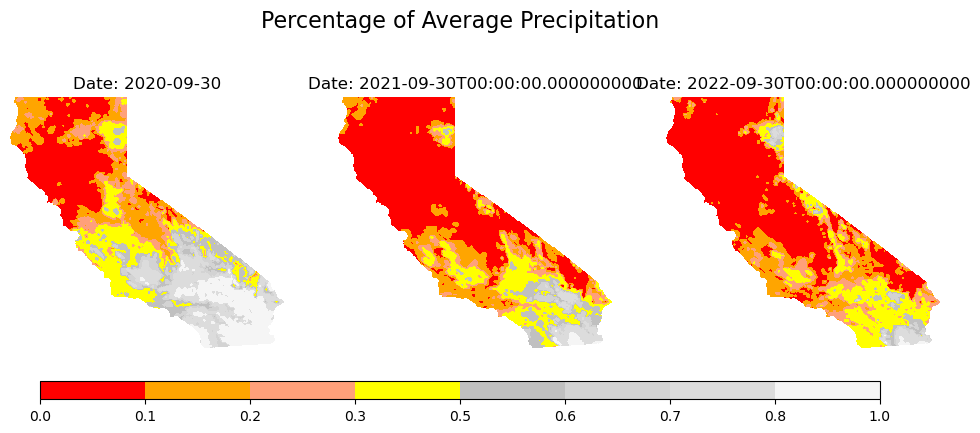

In [12]:
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(12, 6))  # Create a figure with 3 subplots

# Configure the colorbar scale to be between 0 and 1
colors = ['red', 'orange', 'lightsalmon', 'yellow', 'silver', 'lightgrey','gainsboro', 'whitesmoke']
# colors = ['red', 'orange', 'lightsalmon', 'yellow', 'lightgrey', 'gainsboro','whitesmoke', 'white']
# colors = ['red', 'orange', 'lightsalmon', 'yellow', 'lightgrey', 'lightgrey','lightgrey', 'lightgrey']

bounds = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 1.0]        
norm = BoundaryNorm(bounds, len(colors))
custom_cmap = ListedColormap(colors)
levels = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 1.0]

cmap_discrete = ListedColormap(plt.get_cmap('BrBG')(np.linspace(0, 1, 17))[1::2])

# Plot on the first subplot
img = axs[0].contourf(lon, lat, variable_to_plot_1yr[:, :, 368], cmap=custom_cmap, levels=levels)
dates = ds_1yr.date.values
axs[0].set_title(f'Date: {dates[368]}')
axs[0].set_aspect('equal')

# Plot on the second subplot
axs[1].contourf(lon, lat, variable_to_plot_2yr[:, :, 416], cmap=custom_cmap, levels=levels)
dates = ds_2yr.date.values
axs[1].set_title(f'Date: {dates[416]}')
axs[1].set_aspect('equal')

# Plot on the third subplot
axs[2].contourf(lon, lat, variable_to_plot_3yr[:, :, 428], cmap=custom_cmap, levels=levels)
dates = ds_3yr.date.values
axs[2].set_title(f'Date: {dates[428]}')
axs[2].set_aspect('equal')

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    
cbar_ax = fig.add_axes([0.15, 0.2, 0.7, 0.03])  # Adjust the position and size as needed
cbar = plt.colorbar(img, ax=axs[0], orientation='horizontal', shrink=0.8, ticks=[0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 1.0], cax=cbar_ax)

fig.suptitle('Percentage of Average Precipitation', fontsize=16, y=.85) 
plt.show()

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
import numpy as np
from ipywidgets import interact, IntSlider

# Define a function to update the plots based on the selected indices
def update_plots(index_1, index_2, index_3):
    fig, axs = plt.subplots(1, 3, figsize=(12, 6))
    
    # Configure the colorbar scale to be between 0 and 1
    colors = ['red', 'orange', 'lightsalmon', 'yellow', 'silver', 'lightgrey','gainsboro', 'whitesmoke']
    bounds = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 1.0]        
    norm = BoundaryNorm(bounds, len(colors))
    custom_cmap = ListedColormap(colors)
    levels = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 1.0]

    # Plot on the first subplot
    img1 = axs[0].contourf(lon, lat, variable_to_plot_1yr[:, :, index_1], cmap=custom_cmap, levels=levels)
    dates = ds_1yr.date.values
    axs[0].set_title(f'Date: {dates[index_1]}')
    axs[0].set_aspect('equal')

    # Plot on the second subplot
    img2 = axs[1].contourf(lon, lat, variable_to_plot_2yr[:, :, index_2], cmap=custom_cmap, levels=levels)
    dates = ds_2yr.date.values
    axs[1].set_title(f'Date: {dates[index_2]}')
    axs[1].set_aspect('equal')

    # Plot on the third subplot
    img3 = axs[2].contourf(lon, lat, variable_to_plot_3yr[:, :, index_3], cmap=custom_cmap, levels=levels)
    dates = ds_3yr.date.values
    axs[2].set_title(f'Date: {dates[index_3]}')
    axs[2].set_aspect('equal')

    for ax in axs:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])

    cbar_ax = fig.add_axes([0.15, 0.2, 0.7, 0.03])  # Adjust the position and size as needed
    cbar = plt.colorbar(img1, ax=axs[0], orientation='horizontal', shrink=0.8, ticks=[0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 1.0], cax=cbar_ax)
    cbar.set_label('Percentile')

    fig.suptitle('Percentage of Average Precipitation', fontsize=16, y=.85) 
    plt.show()

# Create sliders for each index
interact(update_plots, index_1=(0, len(ds_1yr.date.values)-1), index_2=(0, len(ds_2yr.date.values)-1), index_3=(0, len(ds_3yr.date.values)-1))


interactive(children=(IntSlider(value=197, description='index_1', max=395), IntSlider(value=218, description='…

<function __main__.update_plots(index_1, index_2, index_3)>

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
import numpy as np
from ipywidgets import interact, IntSlider

# Define a function to update the plots based on the selected index
def update_plots(index):
    fig, axs = plt.subplots(1, 3, figsize=(12, 6))
    
    # Configure the colorbar scale to be between 0 and 1
    colors = ['red', 'orange', 'lightsalmon', 'yellow', 'silver', 'lightgrey','gainsboro', 'whitesmoke']
    bounds = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 1.0]        
    norm = BoundaryNorm(bounds, len(colors))
    custom_cmap = ListedColormap(colors)
    levels = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 1.0]

    # Plot on the first subplot
    img1 = axs[0].contourf(lon, lat, variable_to_plot_1yr[:, :, index], cmap=custom_cmap, levels=levels)
    dates = ds_1yr.date.values
    axs[0].set_title(f'Date: {dates[index]}')
    axs[0].set_aspect('equal')

    # Plot on the second subplot
    img2 = axs[1].contourf(lon, lat, variable_to_plot_2yr[:, :, index+36], cmap=custom_cmap, levels=levels)
    dates = ds_2yr.date.values
    axs[1].set_title(f'Date: {dates[index+36]}')
    axs[1].set_aspect('equal')

    # Plot on the third subplot
    img3 = axs[2].contourf(lon, lat, variable_to_plot_3yr[:, :, index+36], cmap=custom_cmap, levels=levels)
    dates = ds_3yr.date.values
    axs[2].set_title(f'Date: {dates[index+36]}')
    axs[2].set_aspect('equal')

    for ax in axs:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])

    cbar_ax = fig.add_axes([0.15, 0.2, 0.7, 0.03])  # Adjust the position and size as needed
    cbar = plt.colorbar(img1, ax=axs[0], orientation='horizontal', shrink=0.8, ticks=[0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 1.0], cax=cbar_ax)
    cbar.set_label('Percentile')

    fig.suptitle('Percentage of Average Precipitation', fontsize=16, y=.85) 
    plt.show()

# Create a slider for the index
interact(update_plots, index=(0, len(ds_1yr.date.values)-1))


interactive(children=(IntSlider(value=197, description='index', max=395), Output()), _dom_classes=('widget-int…

<function __main__.update_plots(index)>